<a href="https://colab.research.google.com/github/harshulgupt/Machine-Learning/blob/master/webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [0]:
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='photo.jpg', quality=0.8, size=(800,600)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))
#starting camera
cap=cv2.VideoCapture(0)

In [53]:
img = take_photo()

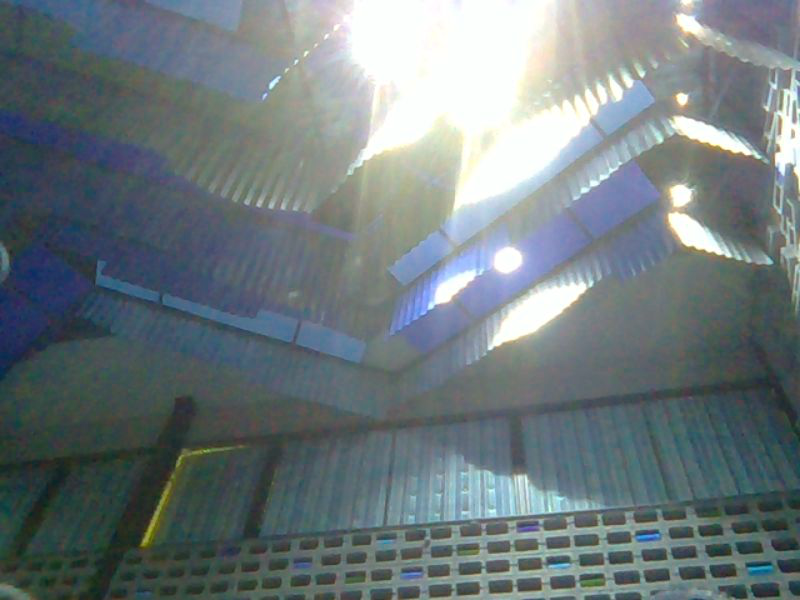

<Figure size 720x720 with 0 Axes>

In [41]:
plt.figure(figsize=(10,10))
cv2_imshow(img)



In [0]:
#to check if camera has started or not
#if cap.isOpened():
#  print("Camera is ready to take picture")
#else:
#  print("Check camera drivers")

In [0]:
#now we can read input from camera
#status,img=cap.read() #it will take first picture